In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os
os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [2]:
root = "GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
wangetal_slitless_bkg = fits.open("GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")[1].data
# flat_model = fits.open("flat_model_{0}".format(root))[0].data
# unique_spectra = fits.open("unique_spectra_{0}".format(root))[1].data
proper_spectra = fits.open("proper_spectra_{0}".format(root))[1].data

In [3]:
# Background subtraction
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(wangetal_slitless_bkg, (511,511), filter_size=(7,7), bkg_estimator=bkg_estimator)
wangetal_slitless = wangetal_slitless_bkg - bkg.background

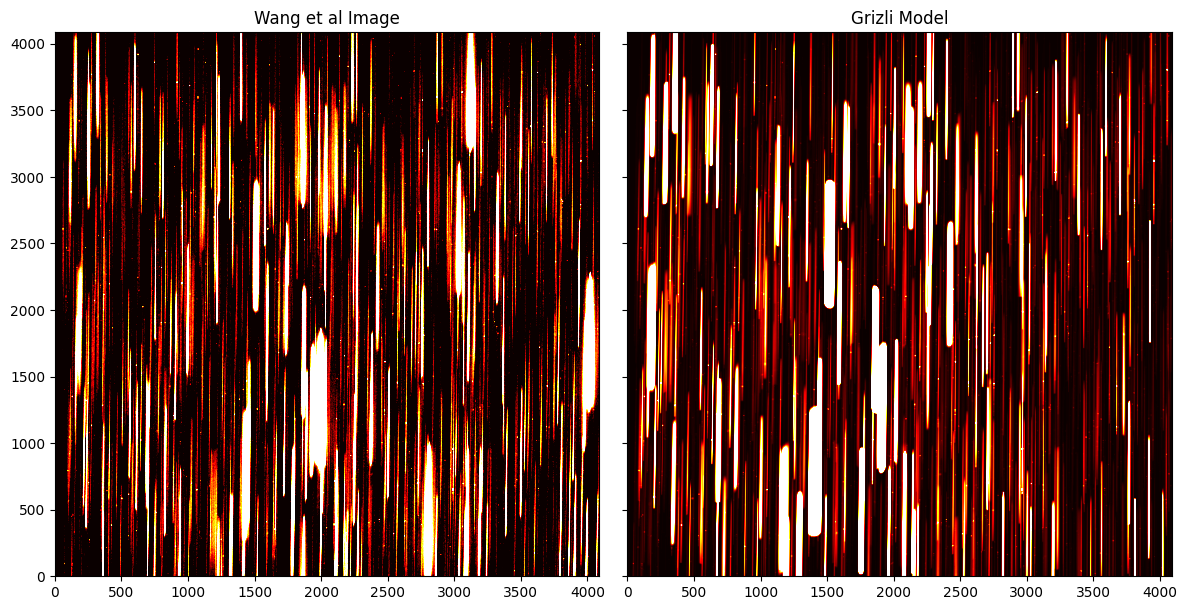

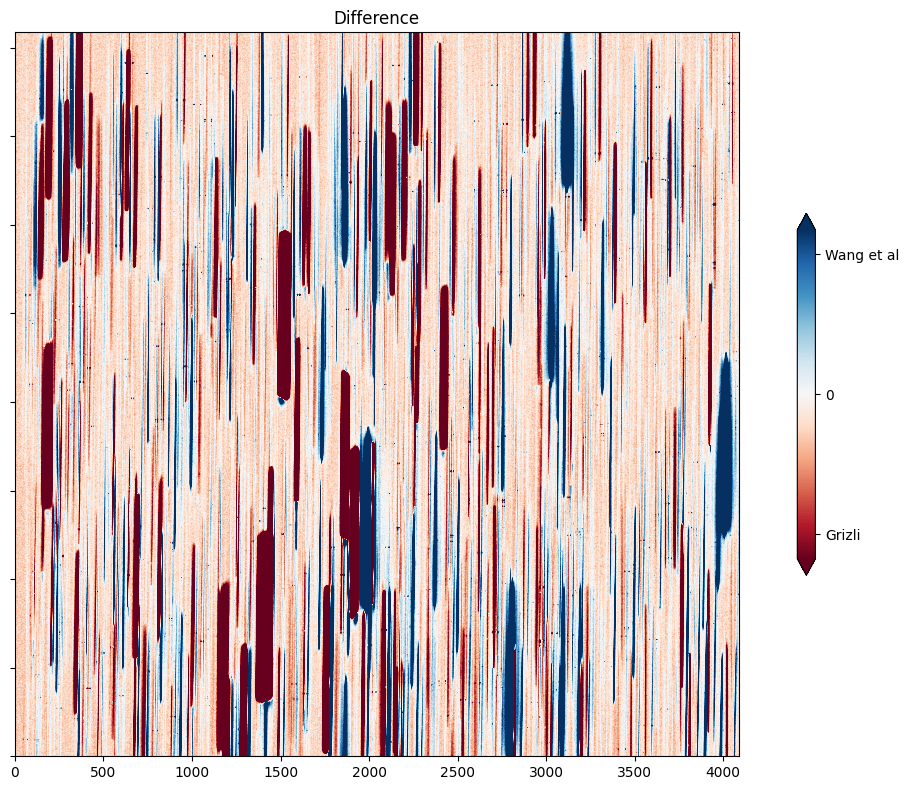

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(proper_spectra, origin='lower', cmap='hot', vmin=0, vmax=proper_spectra.max()/1000)
ax2.set_title("Grizli Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless) / np.median(proper_spectra)
difference = wangetal_slitless - (proper_spectra * scalar)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'Grizli'])

fig.tight_layout()
plt.show()

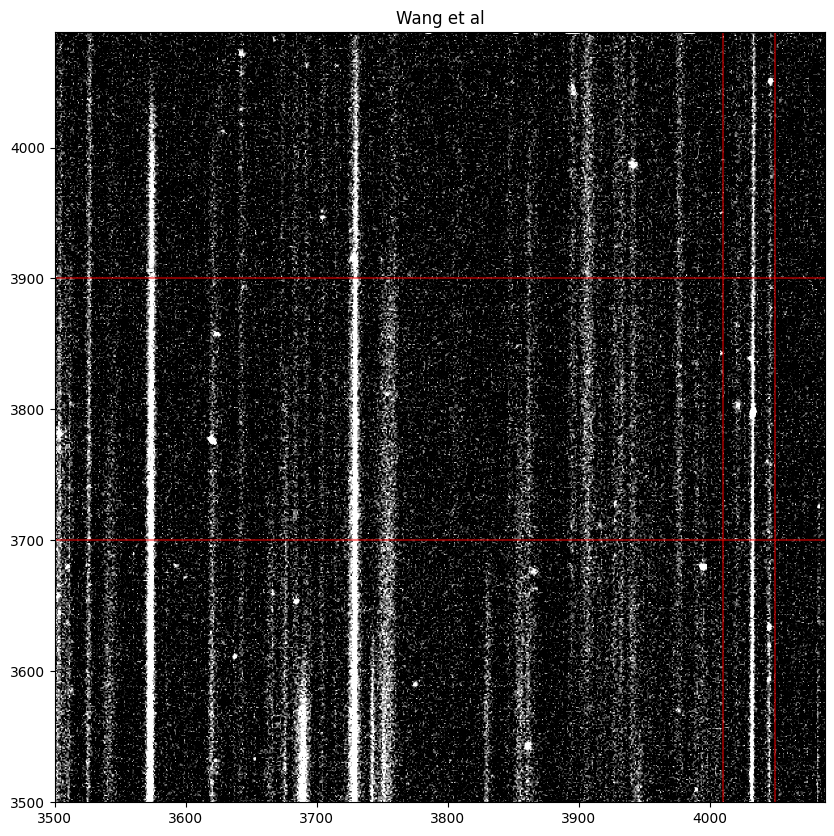

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(wangetal_slitless, origin='lower', cmap='grey', vmin=0, vmax=wangetal_slitless.max()/1000)
ax.set_title("Wang et al")
plt.xlim(3500, 4088)
plt.ylim(3500,4088)

ax.axvline(4010, c='r', alpha=0.5)
ax.axvline(4050, c='r', alpha=0.5)

ax.axhline(3700, c='r', alpha=0.5)
ax.axhline(3900, c='r', alpha=0.5)

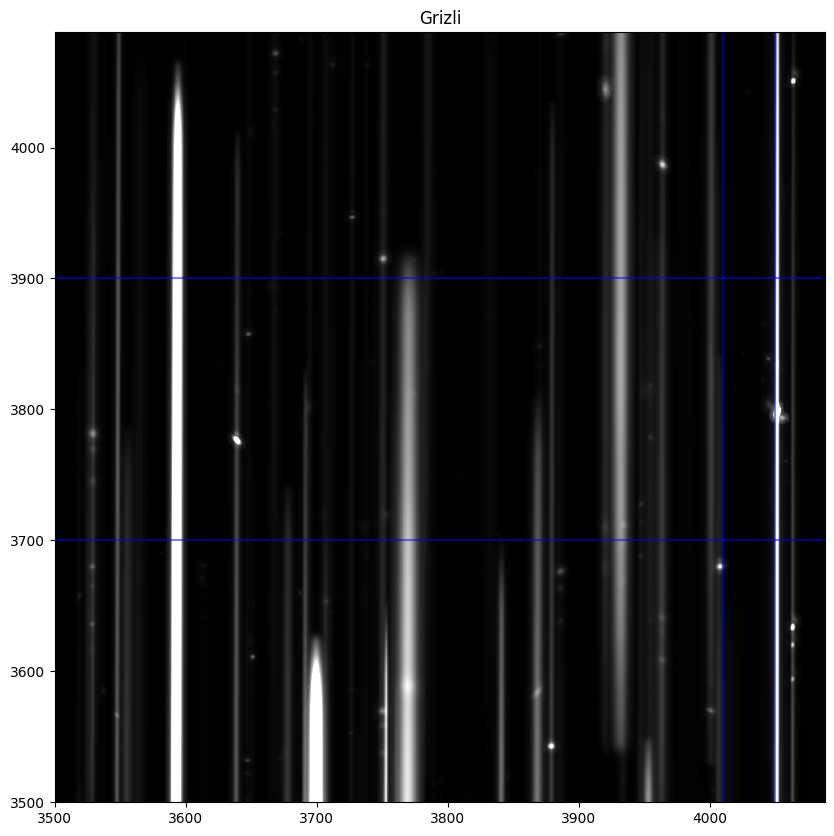

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(proper_spectra, origin='lower', cmap='grey', vmin=0, vmax=proper_spectra.max()/1000)
ax.set_title("Grizli")
plt.xlim(3500, 4088)
plt.ylim(3500,4088)

ax.axvline(4010, c='b', alpha=0.5)
ax.axvline(4050, c='b', alpha=0.5)

ax.axhline(3700, c='b', alpha=0.5)
ax.axhline(3900, c='b', alpha=0.5)